# Advanced Data Preprocessing

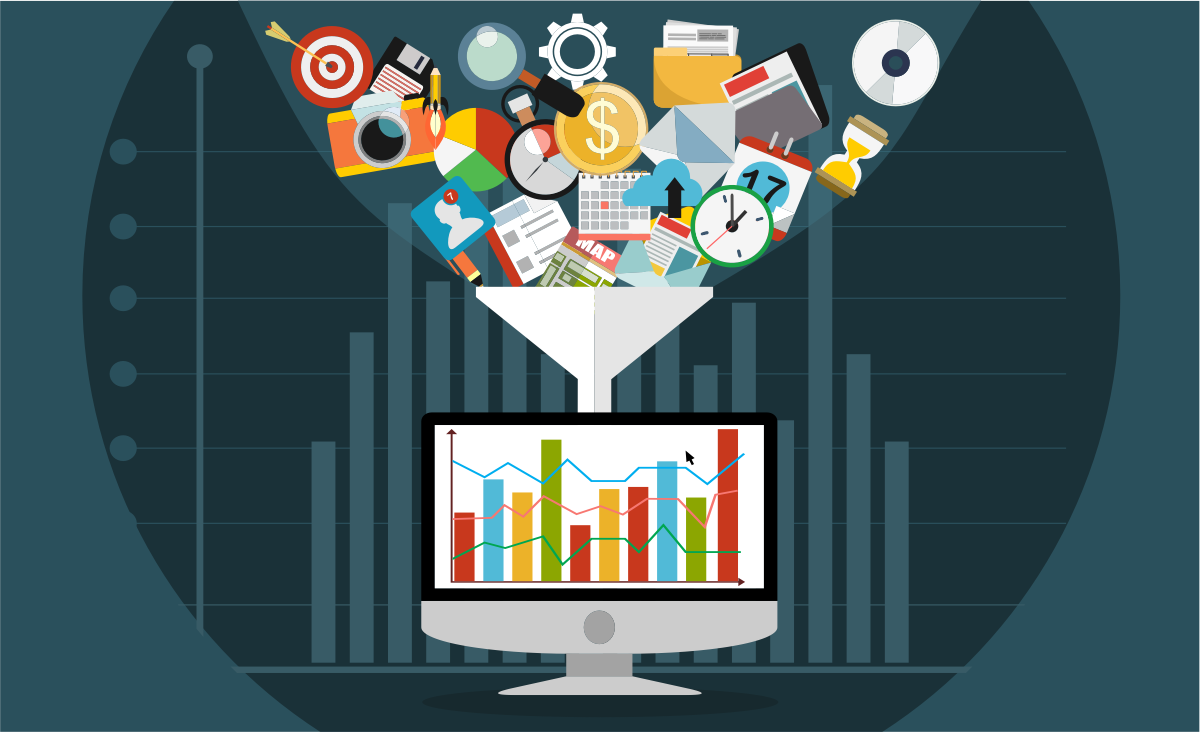

## Outline
 - feature scaling
 - data normalization
 - feature clipping
 - data discretization
 - basic feature selection
 - smote and adasyn

### Data Importing

Data yang akan digunakan dalam sesi ini adalah data titanic, yang dapat diakses melalui link berikut https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
## read data titanic
import pandas as pd
df_titanic=pd.read_csv('/content/train.csv')
df_titanic

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

## Feature Scaling

Scaling merupakan proses transformasi sehingga range nilai berubah dari A-B menjadi A'-B'. Feature scaling dalam Machine Learning/Data Science merupakan salah satu step yang paling penting dalam pre-processing dataset. Hal ini dikarenakan scaling bisa membantu meningkatkan performa model Machine Learning yang dihasilkan.

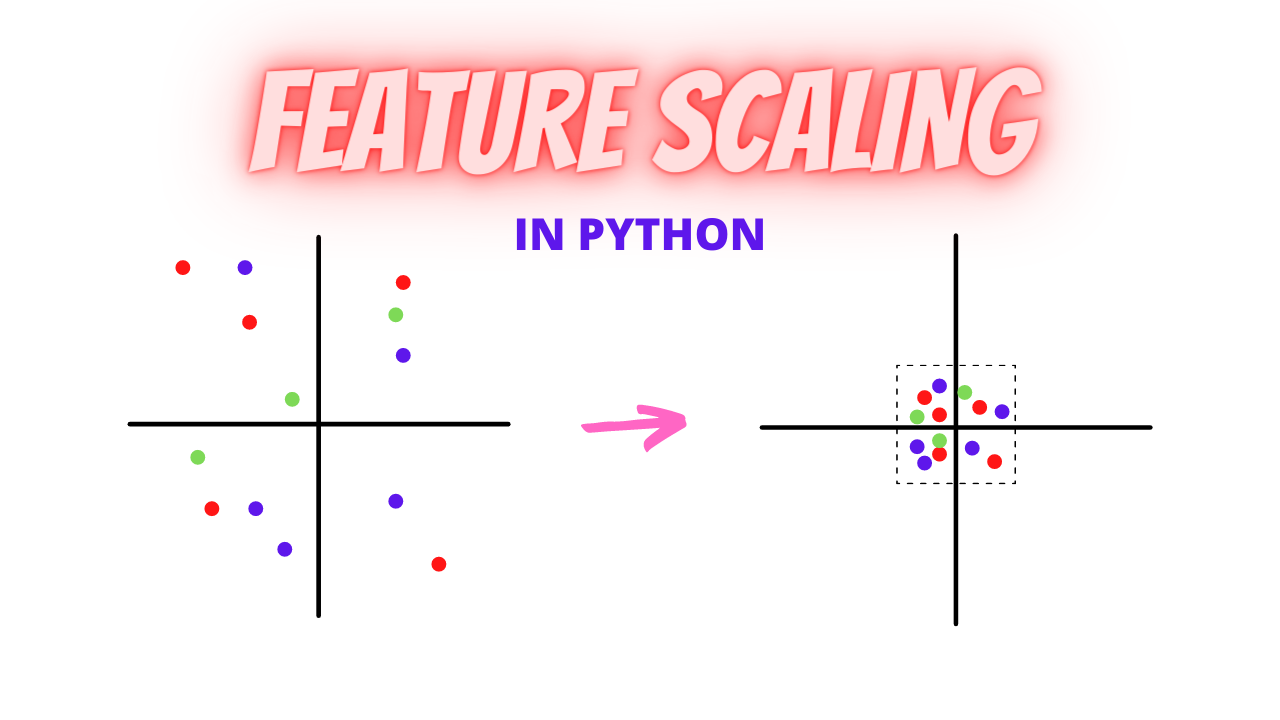

Algoritma machine learning bekerja dengan cara membaca data-data dalam bentuk angka tanpa mengetahui konteks dari besaran angka tersebut. Sebagai contoh, bobot 10 gram dan usia 10 tahun merepresentasikan hal yang berbeda, namun model tidak bisa membaca konteks data tersebut dan memperlakukan dua angka tersebut sama.

Oleh karena itu, feature scaling akan membantu memberikan gambaran berupa nilai angka relatif terhadap persebaran data tersebut (contoh IQ dewasa 120 dan berat badan 110 memiliki perbedaan posisi dalam persebaran data)

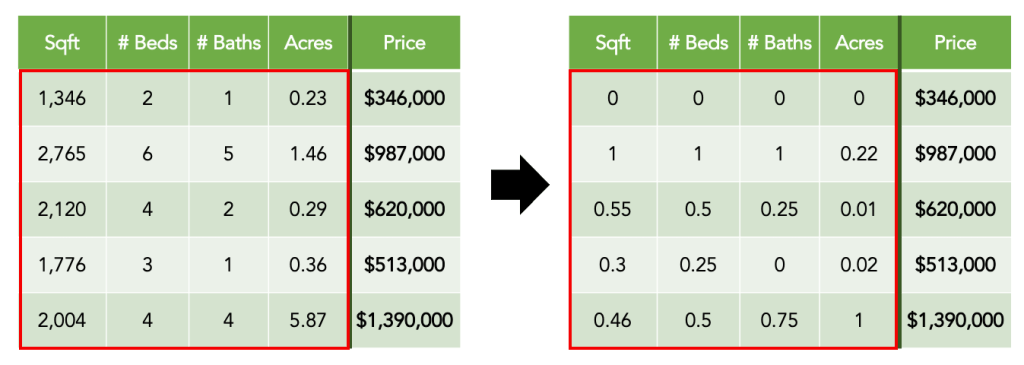

#### Min-max scaler

Min max scaler adalah metode scaling yang mengubah data dengan mengubah range nilai awal ke range yang diinginkan (contohnya 0-1). Metode ini dianjurkan apabila distribusi datanya bukan Gaussian dan standar deviasinya kecil. Namun, scaling ini sangat sensitif terhadap outlier. 

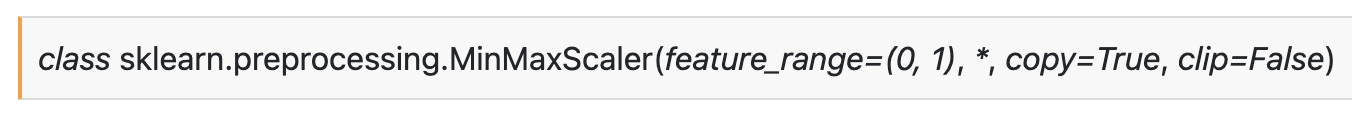

In [ ]:
### contoh min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_titanic[['Age_minmax', 'Fare_minmax']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])
df_titanic

PassengerId  Survived  Pclass  ... Embarked Age_minmax  Fare_minmax
0              1         0       3  ...        S   0.271174     0.014151
1              2         1       1  ...        C   0.472229     0.139136
2              3         1       3  ...        S   0.321438     0.015469
3              4         1       1  ...        S   0.434531     0.103644
4              5         0       3  ...        S   0.434531     0.015713
..           ...       ...     ...  ...      ...        ...          ...
886          887         0       2  ...        S   0.334004     0.025374
887          888         1       1  ...        S   0.233476     0.058556
888          889         0       3  ...        S        NaN     0.045771
889          890         1       1  ...        C   0.321438     0.058556
890          891         0       3  ...        Q   0.396833     0.015127

[891 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


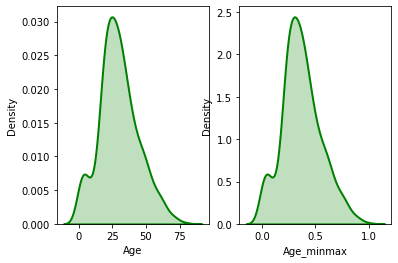

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_minmax'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

#### Standard Scaler

Standard scaler adalah scaling yang menggunakan asumsi bahwa data di masing-masing fitur terdistribusi normal (titik tengah 0 dan standar deviasi 1). Apabila data tidak terdistribusi nomrla, sclaing ini tidak direkomendasikan

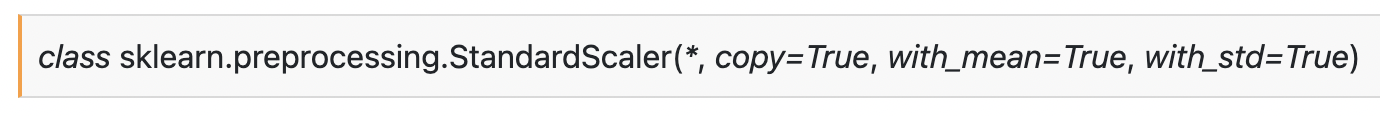

In [ ]:
### contoh standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_titanic[['Age_std', 'Fare_std']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])
df_titanic

PassengerId  Survived  Pclass  ... Fare_minmax   Age_std  Fare_std
0              1         0       3  ...    0.014151 -0.530377 -0.502445
1              2         1       1  ...    0.139136  0.571831  0.786845
2              3         1       3  ...    0.015469 -0.254825 -0.488854
3              4         1       1  ...    0.103644  0.365167  0.420730
4              5         0       3  ...    0.015713  0.365167 -0.486337
..           ...       ...     ...  ...         ...       ...       ...
886          887         0       2  ...    0.025374 -0.185937 -0.386671
887          888         1       1  ...    0.058556 -0.737041 -0.044381
888          889         0       3  ...    0.045771       NaN -0.176263
889          890         1       1  ...    0.058556 -0.254825 -0.044381
890          891         0       3  ...    0.015127  0.158503 -0.492378

[891 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


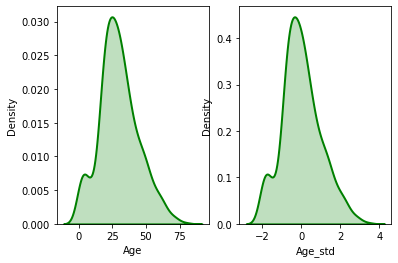

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_std'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

#### Max Abs Scaler

Max Abs scaler adalah scaling yang menggunakan nilai absolut maksimum dari data sebagai batas atas. Scaling ini akan mencari nilai maksimum untuk masing-masing kolom, dan melakukan transformasi sesuai dengan nilai absolut maksimum. Untuk data positif, scaling ini mirip dengan minmax scaler, sehingga rentan juga terhadap outlier.

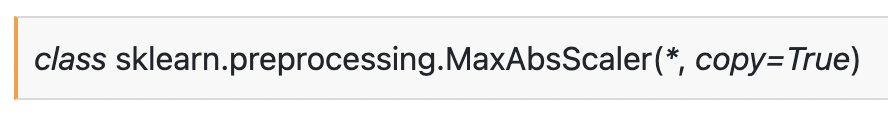

In [ ]:
### contoh max abs scaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_titanic[['Age_maxabs', 'Fare_maxabs']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])
df_titanic

PassengerId  Survived  Pclass  ...  Fare_std Age_maxabs  Fare_maxabs
0              1         0       3  ... -0.502445     0.2750     0.014151
1              2         1       1  ...  0.786845     0.4750     0.139136
2              3         1       3  ... -0.488854     0.3250     0.015469
3              4         1       1  ...  0.420730     0.4375     0.103644
4              5         0       3  ... -0.486337     0.4375     0.015713
..           ...       ...     ...  ...       ...        ...          ...
886          887         0       2  ... -0.386671     0.3375     0.025374
887          888         1       1  ... -0.044381     0.2375     0.058556
888          889         0       3  ... -0.176263        NaN     0.045771
889          890         1       1  ... -0.044381     0.3250     0.058556
890          891         0       3  ... -0.492378     0.4000     0.015127

[891 rows x 18 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


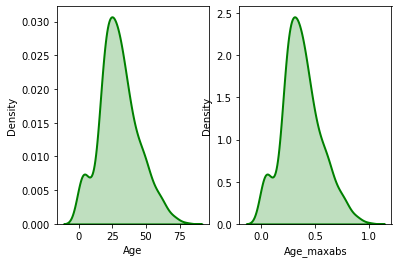

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_maxabs'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

#### Robust Scaler

Robust scaler adalah scaling yang tahan pada outlier. Apabila data yang dimiliki memiliki banyak outlier, scaling yang menggunakan nilai rata-rata dan standard deviasi tidak akan menghasilkan nilai yang baik. Scaling ini justru menggunakan informasi Quantile, yaitu quantile ke 25 dan ke 75, dan akan mentransformasi nilai ke dalam range nilai tersebut. Oleh karena itu, nilai yang dihasilkan tidak akan terpengaruh oleh outlier.

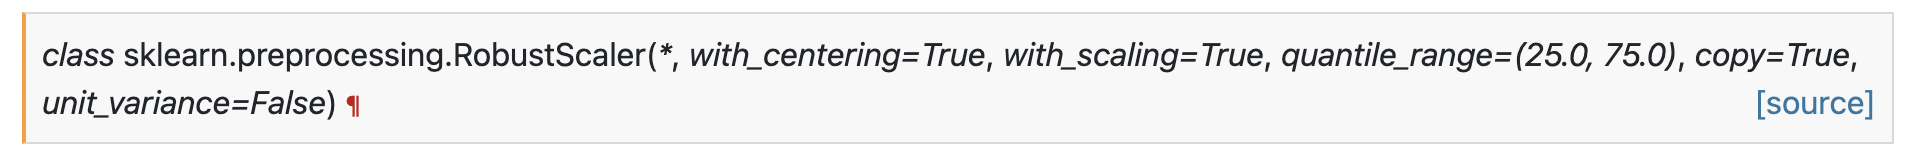

In [ ]:
### contoh robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_titanic[['Age_robust', 'Fare_robust']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])
df_titanic

PassengerId  Survived  Pclass  ... Fare_maxabs Age_robust  Fare_robust
0              1         0       3  ...    0.014151  -0.335664    -0.312011
1              2         1       1  ...    0.139136   0.559441     2.461242
2              3         1       3  ...    0.015469  -0.111888    -0.282777
3              4         1       1  ...    0.103644   0.391608     1.673732
4              5         0       3  ...    0.015713   0.391608    -0.277363
..           ...       ...     ...  ...         ...        ...          ...
886          887         0       2  ...    0.025374  -0.055944    -0.062981
887          888         1       1  ...    0.058556  -0.503497     0.673281
888          889         0       3  ...    0.045771        NaN     0.389604
889          890         1       1  ...    0.058556  -0.111888     0.673281
890          891         0       3  ...    0.015127   0.223776    -0.290356

[891 rows x 20 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


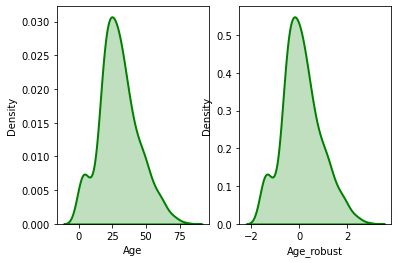

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_robust'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

#### Quantile Transformer Scaler

Quantile transformer scaling adalah scaling nonlinear yang akan mentransformasi data sehingga memiliki distribusi normal. Oleh karena itu, transformasi akan mengubah persebaran data, terutama di rentang nilai yang sering muncul. Walaupun transformasi ini tahan terhadap outlier, data baru yang dihasilkan mungkin tidak memiliki korelasi linear yang sama akibat adanya proses nonlinear. 

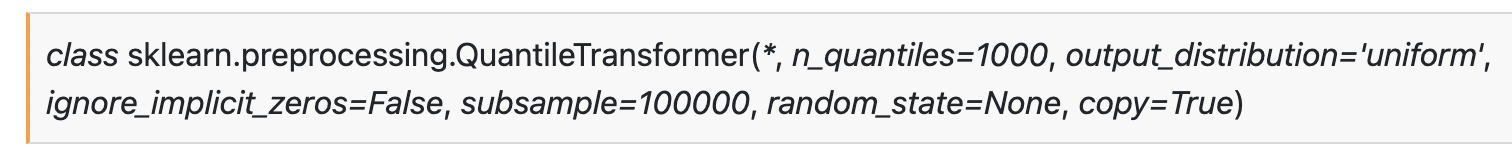

In [ ]:
### contoh quantile transformer scaler
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df_titanic[['Age_qtile', 'Fare_qtile']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])
df_titanic

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


PassengerId  Survived  Pclass  ... Fare_robust Age_qtile  Fare_qtile
0              1         0       3  ...   -0.312011  0.304494    0.084831
1              2         1       1  ...    2.461242  0.744944    0.885393
2              3         1       3  ...   -0.282777  0.433708    0.259551
3              4         1       1  ...    1.673732  0.683708    0.838764
4              5         0       3  ...   -0.277363  0.683708    0.295506
..           ...       ...     ...  ...         ...       ...         ...
886          887         0       2  ...   -0.062981  0.459551    0.456180
887          888         1       1  ...    0.673281  0.211798    0.733708
888          889         0       3  ...    0.389604       NaN    0.612360
889          890         1       1  ...    0.673281  0.433708    0.733708
890          891         0       3  ...   -0.290356  0.612360    0.137640

[891 rows x 22 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


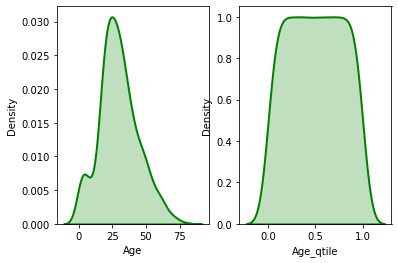

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_qtile'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

### Data Normalization

Data normalization adalah proses untuk mengubah distribusi data family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 

### Data Normalization vs Feature Scaling

Walaupun kedua istilah diatas sering diartikan sama, ada sedikit perbedaan dari tujuan dan prosesnya. Data normalisasi merujuk ke proses transformasi nilai data sehingga mendekati persebaran data normal. Sementara scaling digunakan untuk mengubah range nilai data.

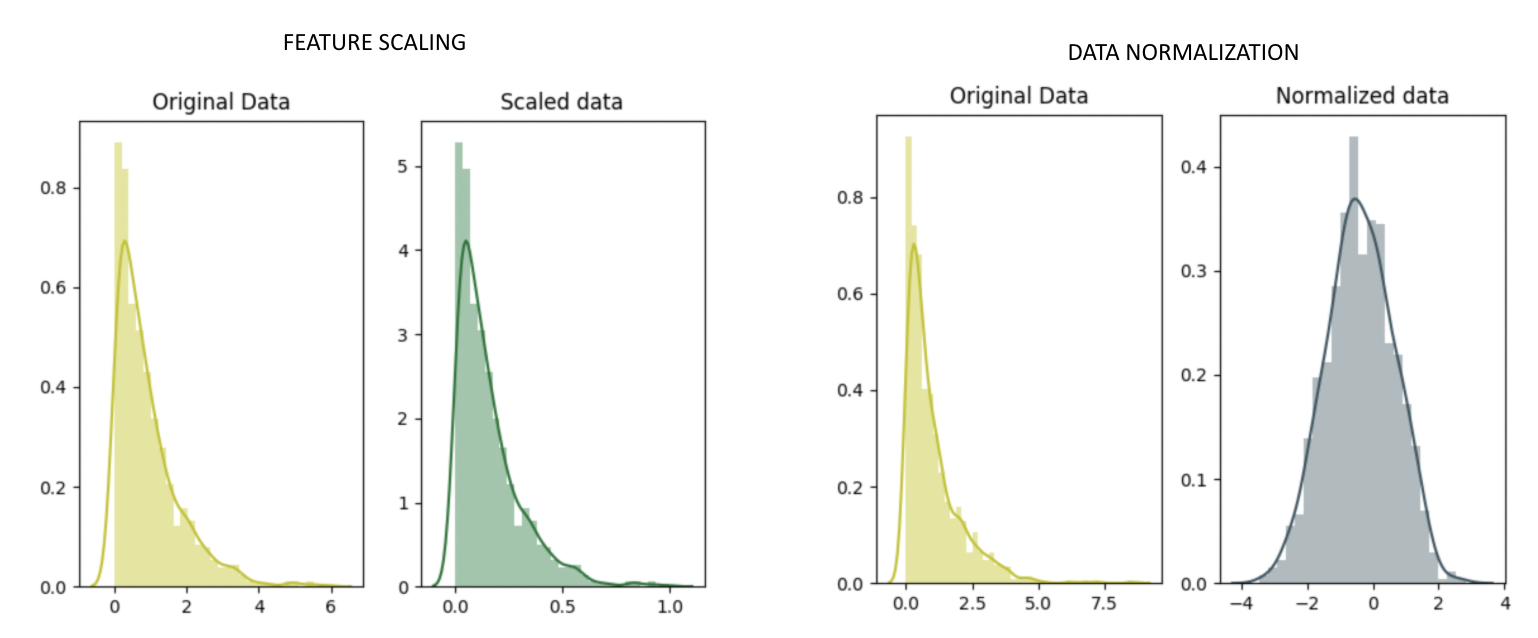

#### Box cox transformation

box cox transformation adalah proses untuk normalisasi menggunakan family functions seperti di bawah ini. Untuk mendapatkan nilai lambda, MLE digunakan

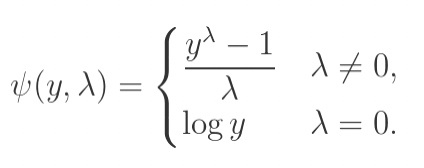


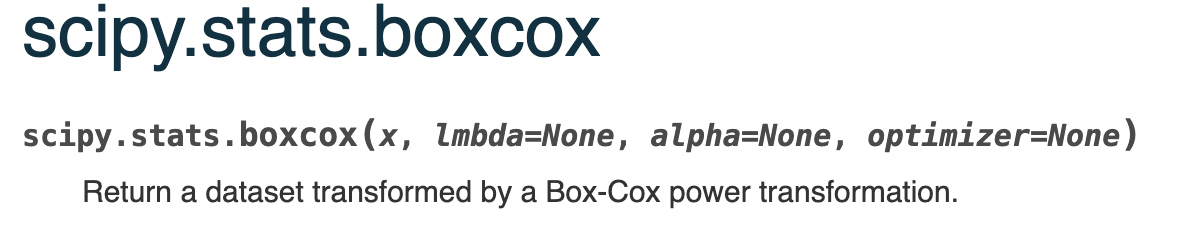

In [ ]:
### contoh boxcox transformation
from scipy import stats
df_titanic['Age_boxcox']=stats.boxcox(df_titanic['Age'])[0]
df_titanic

PassengerId  Survived  Pclass  ... Age_qtile Fare_qtile    Age_boxcox
0              1         0       3  ...  0.304494   0.084831  2.787368e+10
1              2         1       1  ...  0.744944   0.885393  2.858566e+12
2              3         1       3  ...  0.433708   0.259551  1.147766e+11
3              4         1       1  ...  0.683708   0.838764  1.424168e+12
4              5         0       3  ...  0.683708   0.295506  1.424168e+12
..           ...       ...     ...  ...       ...        ...           ...
886          887         0       2  ...  0.459551   0.456180  1.580212e+11
887          888         1       1  ...  0.211798   0.733708  8.049729e+09
888          889         0       3  ...       NaN   0.612360           NaN
889          890         1       1  ...  0.433708   0.733708  1.147766e+11
890          891         0       3  ...  0.612360   0.137640  6.665644e+11

[891 rows x 23 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


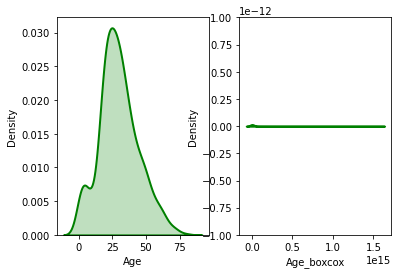

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

### yeo johnson transformation

The Yeo-Johnson transformation sangat mirip dengan transformasi Box-cox, hanya sajak yeo johnson tidak mengharuskan nilai lambda positif. Fungsi transformasi yang digunakan adalah sebagai berikut:

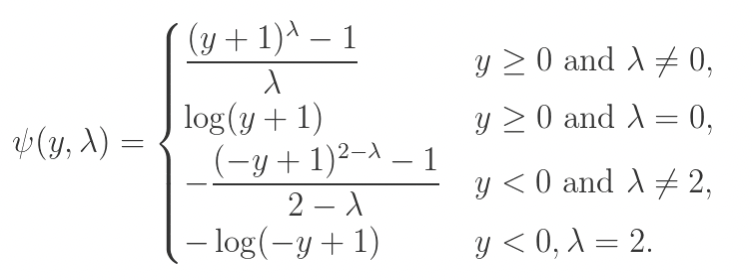

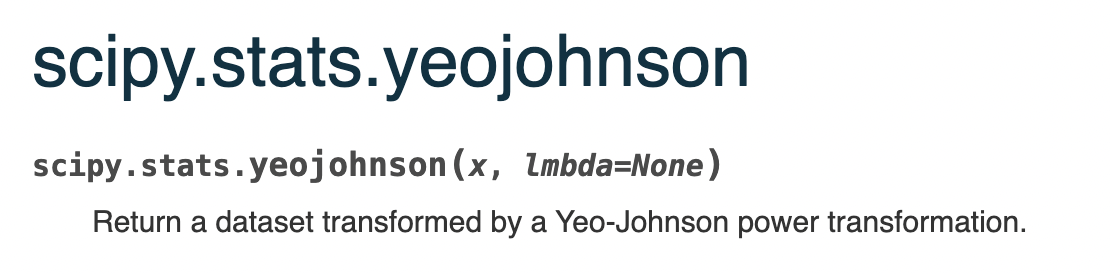

In [ ]:
### contoh yeojohnson
df_titanic['Age_yeojohnson']=stats.yeojohnson(df_titanic['Age'])[0]
df_titanic

PassengerId  Survived  Pclass  ... Fare_qtile    Age_boxcox  Age_yeojohnson
0              1         0       3  ...   0.084831  2.787368e+10    4.062097e+10
1              2         1       1  ...   0.885393  2.858566e+12    3.562235e+12
2              3         1       3  ...   0.259551  1.147766e+11    1.580212e+11
3              4         1       1  ...   0.838764  1.424168e+12    1.808062e+12
4              5         0       3  ...   0.295506  1.424168e+12    1.808062e+12
..           ...       ...     ...  ...        ...           ...             ...
886          887         0       2  ...   0.456180  1.580212e+11    2.150436e+11
887          888         1       1  ...   0.733708  8.049729e+09    1.243111e+10
888          889         0       3  ...   0.612360           NaN             NaN
889          890         1       1  ...   0.733708  1.147766e+11    1.580212e+11
890          891         0       3  ...   0.137640  6.665644e+11    8.650942e+11

[891 rows x 24 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


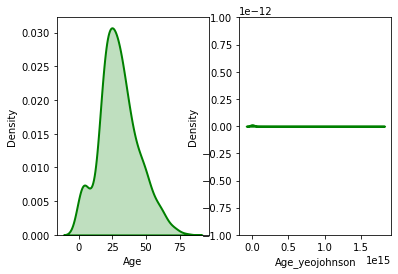

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_yeojohnson'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

#### Power Transformer Scaler

Power transformer scaler adalah library data normalization yang yang disediakan oleh sklearn. Library ini memberikan kebebasan pada user terhadap algoritma normalisasi yang akan digunakan

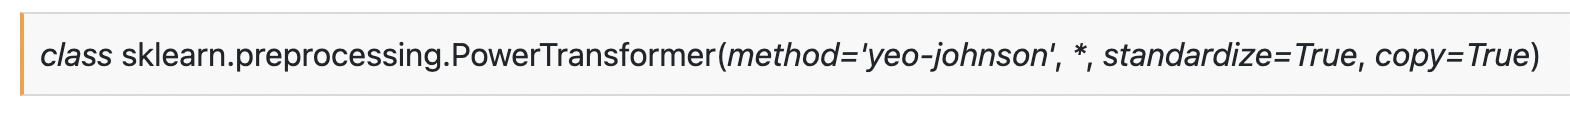

In [ ]:
### contoh power transformer scaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_titanic[['Age_ptsklearn']]=pt.fit_transform(df_titanic[['Age']])
df_titanic

PassengerId  Survived  Pclass  ...    Age_boxcox Age_yeojohnson  Age_ptsklearn
0              1         0       3  ...  2.787368e+10   4.062097e+10      -0.472172
1              2         1       1  ...  2.858566e+12   3.562235e+12       0.605017
2              3         1       3  ...  1.147766e+11   1.580212e+11      -0.189376
3              4         1       1  ...  1.424168e+12   1.808062e+12       0.412768
4              5         0       3  ...  1.424168e+12   1.808062e+12       0.412768
..           ...       ...     ...  ...           ...            ...            ...
886          887         0       2  ...  1.580212e+11   2.150436e+11      -0.120309
887          888         1       1  ...  8.049729e+09   1.243111e+10      -0.692126
888          889         0       3  ...           NaN            NaN            NaN
889          890         1       1  ...  1.147766e+11   1.580212e+11      -0.189376
890          891         0       3  ...  6.665644e+11   8.650942e+11       0.216602

[891 rows x 25 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


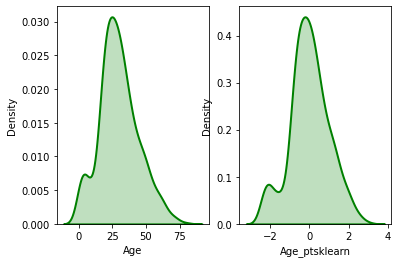

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_ptsklearn'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

### Feature Clipping

Untuk menghandle outlier, cara termudah yang bisa dilakukan adalah feature clipping. Proses ini akan mengubah semua data diluar threshold menjadi nilai threshold, dengan kata lain outlier akan dipaksa nilainya menjadi batas atas

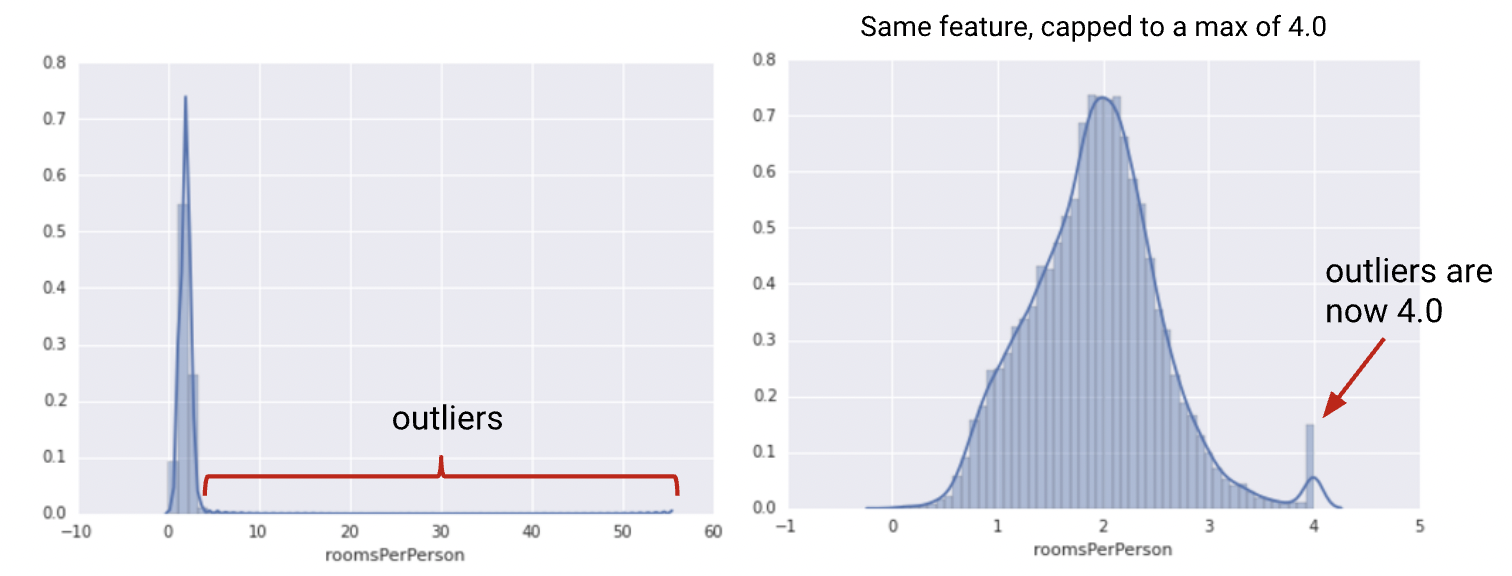

untuk melakukan proses ini, kita bisa menggunakan method clip yang disediakan oleh pandas. definisi fungsi tersebut dapat dilihat pada gambar berikut:

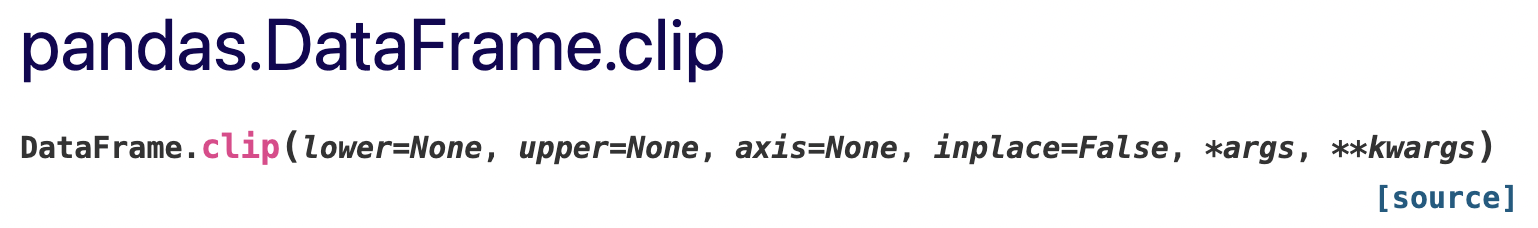

In [ ]:
### contoh feature clipping
df_titanic['Age_clipped']=df_titanic['Age'].clip(lower=0, upper=60)
df_titanic

PassengerId  Survived  Pclass  ... Age_yeojohnson Age_ptsklearn  Age_clipped
0              1         0       3  ...   4.062097e+10     -0.472172         22.0
1              2         1       1  ...   3.562235e+12      0.605017         38.0
2              3         1       3  ...   1.580212e+11     -0.189376         26.0
3              4         1       1  ...   1.808062e+12      0.412768         35.0
4              5         0       3  ...   1.808062e+12      0.412768         35.0
..           ...       ...     ...  ...            ...           ...          ...
886          887         0       2  ...   2.150436e+11     -0.120309         27.0
887          888         1       1  ...   1.243111e+10     -0.692126         19.0
888          889         0       3  ...            NaN           NaN          NaN
889          890         1       1  ...   1.580212e+11     -0.189376         26.0
890          891         0       3  ...   8.650942e+11      0.216602         32.0

[891 rows x 26 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


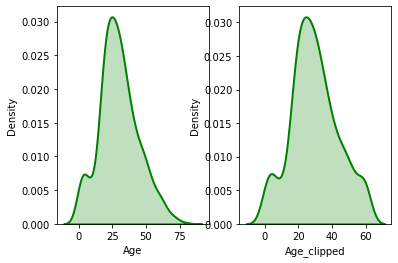

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df_titanic['Age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(df_titanic['Age_clipped'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

### Data Discretization

Data discretization merupakan proses membagi data bertipe numerik ke dalam beberapa kelompok sesuai dengan range nilai data tersebut. Hal ini akan memudahkan pembuatan model machine learning jika suatu data numerik tidak berkorelasi linear sempurna dengan variabel lain

#### K-Bins discretization

Seringkali, transformasi data variabel untuk memiliki probability distribution yang standard sangat diperlukan. Salah satu cara yang bisa digunakan adalah dengan mengubah data numerik supaya memiliki probbaility distribution yang diskrit dimana masing-masing nilai akan diassign ke label dan label tersebut bersifat ordinal. Proses ini dinamakan sebagai binning atau discretization, dan terbukti mampu meningkatkan performa machine learning model yang dihasilkan. 

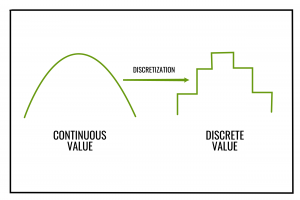

Nilai dari variabal numerik akan dikelompokkan ke dalam kelompok-kelompok (bin) dan masing-masing bin akan diassign range nilai nya sehingga ordinal relationship masih bisa didapatkan. Penggunaan bin sering disebut sebagai k-bins, dimana nilai k merujuk ke jumlah kelompok yang akan digunakan untuk pemetaan data variabel. 

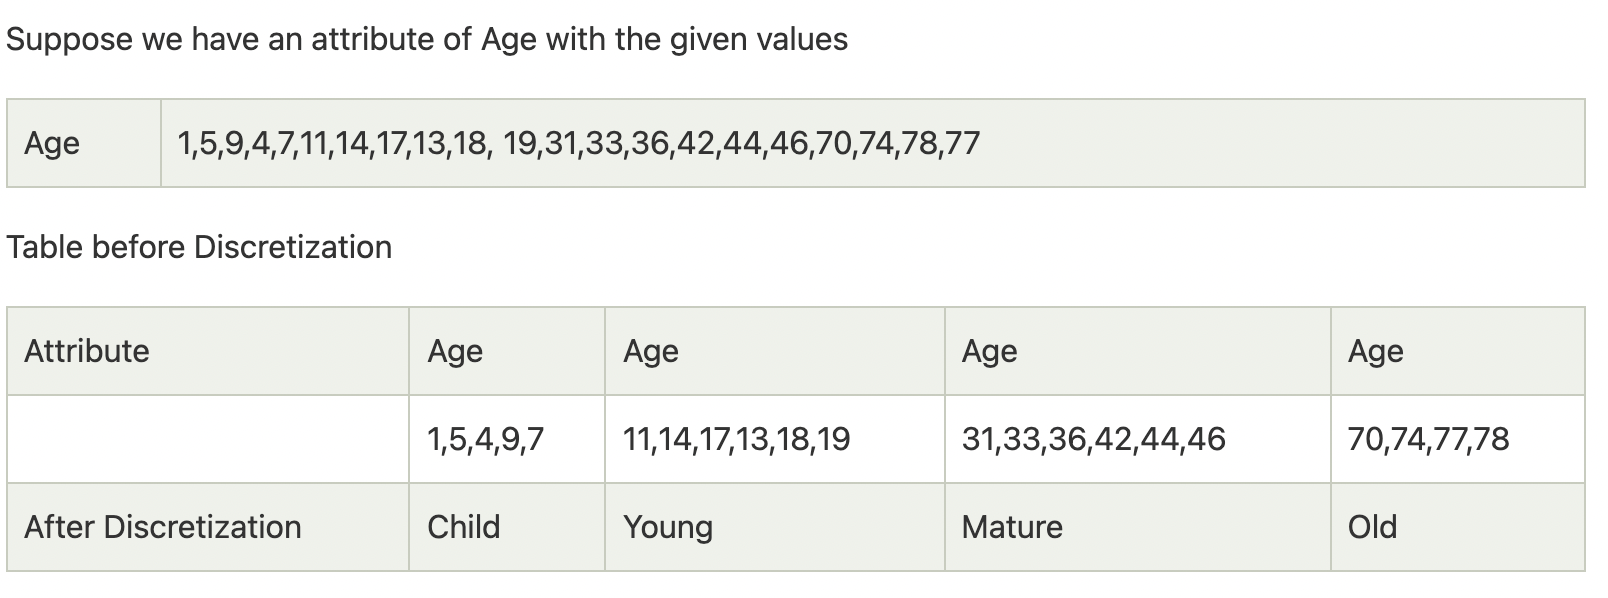

Sklearn menyediakan method untuk melakukan proses discretization, yaitu KBinsDiscretizer 

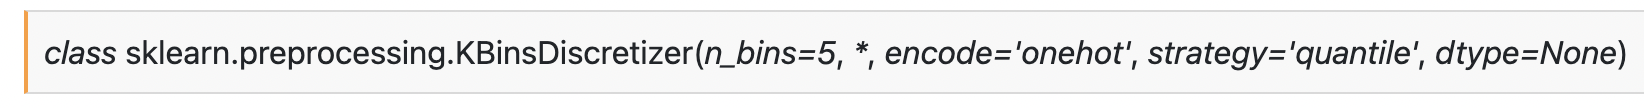

##### strategy uniform

Uniform discretization akan mengubah data numerik menjadi ordinal dengan mempertahankan nilai distribusinya. Discretization ini bersifat naif, karena langsung memecah data yang ada ke dalam beberapa kolom, sehingga sangat sensitif terhadap outlier.

In [ ]:
### contoh uniform strategy
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_titanic[['Age_notna', 'Fare_notna']]=df_titanic[['Age', 'Fare']].fillna(0)
df_titanic[['Age_uniform', 'Fare_uniform']] = est.fit_transform(df_titanic[['Age_notna', 'Fare_notna']])
df_titanic

PassengerId  Survived  Pclass  ... Fare_notna Age_uniform  Fare_uniform
0              1         0       3  ...     7.2500         1.0           0.0
1              2         1       1  ...    71.2833         2.0           0.0
2              3         1       3  ...     7.9250         1.0           0.0
3              4         1       1  ...    53.1000         2.0           0.0
4              5         0       3  ...     8.0500         2.0           0.0
..           ...       ...     ...  ...        ...         ...           ...
886          887         0       2  ...    13.0000         1.0           0.0
887          888         1       1  ...    30.0000         1.0           0.0
888          889         0       3  ...    23.4500         0.0           0.0
889          890         1       1  ...    30.0000         1.0           0.0
890          891         0       3  ...     7.7500         2.0           0.0

[891 rows x 26 columns]

##### strategy quantile

Quantile discretization akan memecah data ke dalam k kelompok, dimana jumlah data dalam masing-masing kelompok akan serupa. Jumlah kelompok yang disarankan adalah 5-10, kecuali dalam kasus dimana jumlah data yang tersedia dan distribusinya sangat besar. 

In [ ]:
### contoh strategy quantile
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df_titanic[['Age_qtile_bin', 'Fare_qtile_bin']] = est.fit_transform(df_titanic[['Age_notna', 'Fare_notna']])
df_titanic

PassengerId  Survived  Pclass  ... Fare_uniform Age_qtile_bin  Fare_qtile_bin
0              1         0       3  ...          0.0           2.0             0.0
1              2         1       1  ...          0.0           4.0             4.0
2              3         1       3  ...          0.0           2.0             1.0
3              4         1       1  ...          0.0           3.0             4.0
4              5         0       3  ...          0.0           3.0             1.0
..           ...       ...     ...  ...          ...           ...             ...
886          887         0       2  ...          0.0           2.0             2.0
887          888         1       1  ...          0.0           1.0             3.0
888          889         0       3  ...          0.0           0.0             3.0
889          890         1       1  ...          0.0           2.0             3.0
890          891         0       3  ...          0.0           3.0             0.0

[891 rows x 28 columns]

##### strategy kmeans

K-means discretization merupakan proses transformasi data menggunakan metode K Means. K cluster akan dibentuk sesuai dengan data yang digunakan dan data tersebut akan diassign ke dalam satu cluster. Gold standard yang sering digunakan untuk menentukan jumlah cluster yang bisa dibentuk adalah 3-5. 

In [ ]:
### contoh strategy kmeans
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df_titanic[['Age_qtile_bin', 'Fare_qtile_bin']] = est.fit_transform(df_titanic[['Age_notna', 'Fare_notna']])
df_titanic

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:184: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


PassengerId  Survived  Pclass  ... Fare_uniform Age_qtile_bin  Fare_qtile_bin
0              1         0       3  ...          0.0           1.0             0.0
1              2         1       1  ...          0.0           2.0             1.0
2              3         1       3  ...          0.0           1.0             0.0
3              4         1       1  ...          0.0           2.0             1.0
4              5         0       3  ...          0.0           2.0             0.0
..           ...       ...     ...  ...          ...           ...             ...
886          887         0       2  ...          0.0           2.0             0.0
887          888         1       1  ...          0.0           1.0             0.0
888          889         0       3  ...          0.0           0.0             0.0
889          890         1       1  ...          0.0           1.0             0.0
890          891         0       3  ...          0.0           2.0             0.0

[891 rows x 28 columns]

### Basic Feature Selection

Feature selection merupakan proses untuk memilih feature-feature mana saja yang akan digunakan . Cara yang akan dibahas disini adalah memilih feature dengan nilai yang sama ataupun berbeda untuk semua baris yang ada. Hal ini menandakan bahwa fitur tersebut tidak mampu memberikan pattern terhadap satu nilai karena nilainya yang sama atu berbeda semua.

Untuk melihat fitur non numerik mana saja yang memiliki nilai yang sama atau berbeda, kita bisa memanfaatkan fungsi nunique

In [ ]:
### melihat distinct values di satu kolom
df_titanic[['PassengerId','Survived','Pclass','Name',	'Sex',	'Parch',	'Ticket',	'Cabin',	'Embarked']].nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Parch            7
Ticket         681
Cabin          147
Embarked         3
dtype: int64

Dari daftar di atas, dapat diketahui bahwa dalam kolom PassengerId dan Name terdapat 891 unique values. Jumlah itu sesuai dengan jumlah baris yang ada pada dataset, sehingga dapat disimpulkan bahwa nilai yang ada pada kolom tersebut berbeda di masing-masing baris. Oleh karena itu, dua kolom tersebut bisa dihapus untuk keperluan analisis dan modelling.

### Data augmentation

Data augmentation adalah proses dimana kita membuat data 'tambahan' untuk menyelesaikan imbalanced class dataset problem. Ada beberapa teknik yang sering digunakan, antara lain:

#### SMOTE

SMOTE bekerja dengan cara memilih data-data yang "dekat", menarik garis antara titik-titik tersebut,kemudian membuat data tambahan pada garis tersebut. Iteratively, random poin pada kelas minority dipilih, kemudian k tetangga terdekat dari poin itu dipilih. Setelah itu, garis-garis akan dibuat antara poin tersebut dengan masing-masing tetangga dan data sintesis dibuat along the line. 

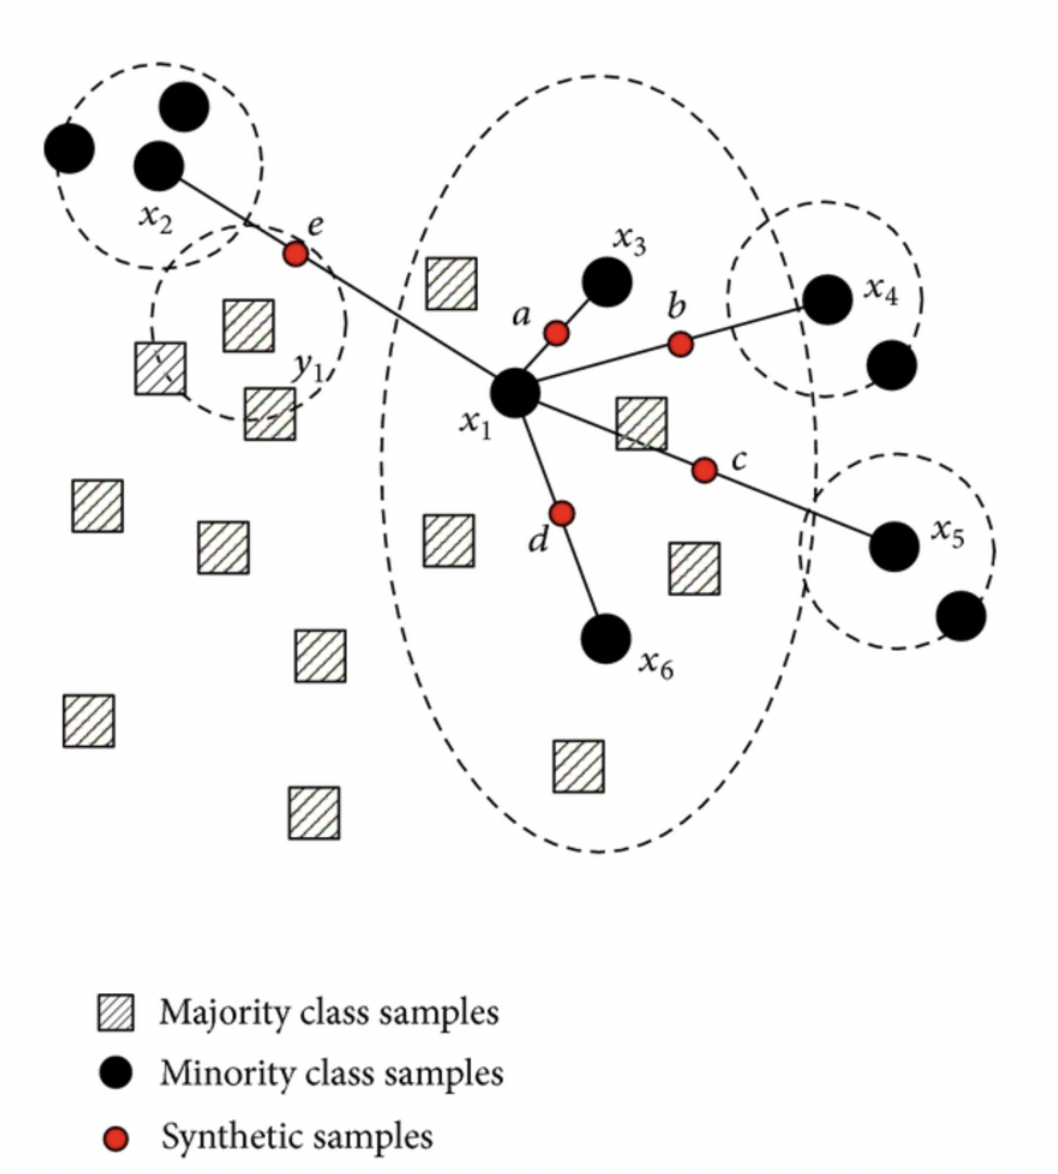

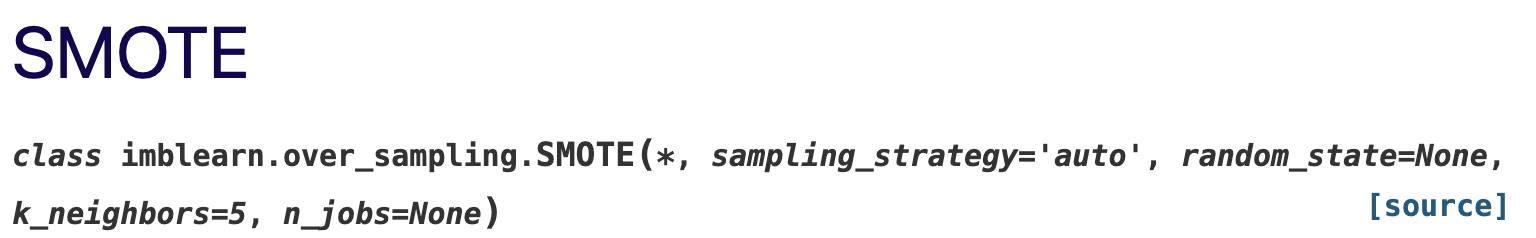

The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

In [ ]:
### contoh smote
from imblearn.over_sampling import SMOTE
y=df_titanic['Survived']
X=df_titanic[['Age_notna','Fare_notna']]
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
import numpy
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)
unique, counts = numpy.unique(y_res, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 549, 1: 549}

#### SMOTE Borderline

SMOTE Borderline adalah pengembangan dari algoritma SMOTE yang membuat data sintesis pada boundary antar kelas, instead of membuat data sesuai dengan persebaran data. Hal ini dilakukan untuk meningkatkan kontras antara kelas minor dan kelas major. 

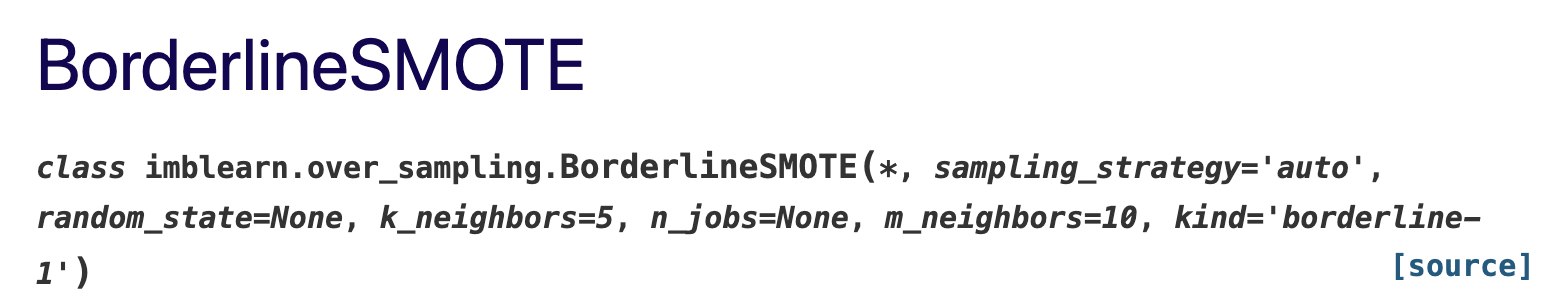

In [ ]:
### contoh smote borderline
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_res, y_res = oversample.fit_resample(X, y)
unique, counts = numpy.unique(y_res, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 549, 1: 549}

#### ADASYN

ADASYN merupakan improved version dari SMOTE dengan mengubah algoritma sintesis data secara minor. Salah satunya adalah menambahkan beberapa nilai random terhadap data baru yang sudah dibuat sehingga data menjadi lebih realistis. Dengan kata lain, data yang dibuat memiliki sedikit variance sehingga data tersebut lebih acak dibandingkan dengan data yang dibuat oleh SMOTE.

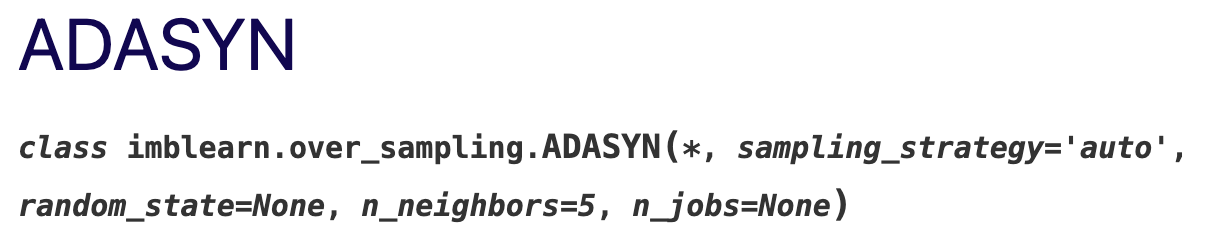

In [ ]:
### contoh adasyn
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_res, y_res = oversample.fit_resample(X, y)
unique, counts = numpy.unique(y_res, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 549, 1: 505}